Initial X :  [0.12 0.8  0.16 0.34 0.91 0.37 0.85 0.61 0.45 0.23 0.99 0.43]
Initial W :  [0.20592898 0.29832219 0.40316087 0.04896435 0.53483332 0.72541813
 0.88429517 0.54795813 0.30649244 0.05842728 0.91967434 0.84396083]
Predicted: 0.30000000000000004


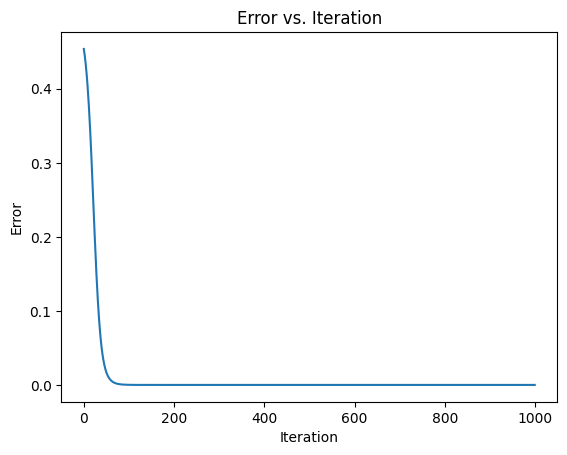

In [ ]:
import numpy
import matplotlib.pyplot as plt

def sigmoid(sop):
    return 1.0 / (1 + numpy.exp(-1 * sop))

def error(predicted, target):
    return numpy.power(predicted - target, 2)

def error_predicted_deriv(predicted, target):
    return 2 * (predicted - target)

def sigmoid_sop_deriv(sop):
    return sigmoid(sop) * (1.0 - sigmoid(sop))

def sop_w_deriv(x):
    return x

def update_w(w, grad, learning_rate):
    return w - learning_rate * grad

x = numpy.array([
    0.12,
    0.80,
    0.16,
    0.34,
    0.91,
    0.37,
    0.85,
    0.61,
    0.45,
    0.23,
    0.99,
    0.43,
])
target = 0.3
learning_rate = 0.1
w = numpy.random.rand(len(x))
print("Initial X : ", x)
print("Initial W : ", w)

error_history = []  # List untuk menyimpan error di setiap iterasi
iterations = 1000  # Jumlah iterasi yang dilakukan

for _ in range(iterations):
    # Forward Pass
    y = 0
    for i in range(len(x)):
        y += x[i] * w[i]
    predicted = sigmoid(y)
    err = error(predicted, target)

    # Simpan nilai error ke list
    error_history.append(err)

    # Backward Pass
    g1 = error_predicted_deriv(predicted, target)
    g2 = sigmoid_sop_deriv(predicted)

    # g3w1 = sop_w_deriv(x1)
    # g3w2 = sop_w_deriv(x2)
    g3w = [sop_w_deriv(xn) for xn in x]

    # gradw1 = g3w1 * g2 * g1
    # gradw2 = g3w2 * g2 * g1
    gradw = [g3w[i] * g2 * g1 for i in range(len(g3w))]

    # w1 = update_w(w1, gradw1, learning_rate)
    # w2 = update_w(w2, gradw2, learning_rate)
    w = [update_w(w[i], gradw[i], learning_rate) for i in range(len(w))]

print("Predicted:", predicted)

# Tampilkan diagram error
plt.plot(error_history)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error vs. Iteration')
plt.show()